<a href="https://colab.research.google.com/github/dave0629g/simpleMLP/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.mnist import load_data
((x_train, y_train), (x_test,y_test)) = load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,223,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,161,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,91,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


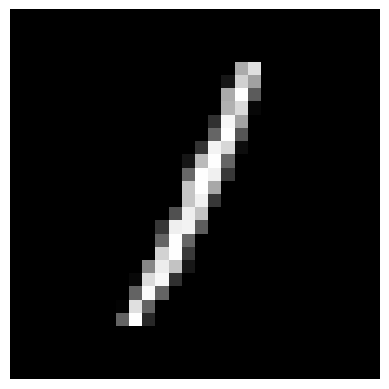

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as pd

c = random.randint(0, x_train.shape[0]-1)
plt.axis('off')
plt.imshow(x_train[c],cmap='gray')
pd.DataFrame(x_train[c])

In [5]:
# 資料預處理
# 1. Normalize (suitable for keras's default weights)
#   1.1 0-1 sigmoid
#   1.2 -1 - 1
#   Flatten for MLP  
x_train_flatten_normal = x_train.reshape(60000,784) /255
x_test_flatten_normal = x_test.reshape(10000,784) /255
# x_train_flatten_normal[0]

In [6]:
# 2. 答案預處理(One-Hot encoding)
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
mlp.add(Dense(128,activation='relu',input_dim=784))
mlp.add(Dense(10,activation='softmax'))
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
